## Final Project - K-Nearest Neighbors Classifier

### 0. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

### 1. Loading data

In [2]:
# Read the csv file
data = pd.read_csv('../data/clean_data/clean_data.csv')
data.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [3]:
data.shape

(174, 451)

### 2. Processing Data

In [4]:
# Separate features and target
X = data.drop(['class'], axis=1)

# Save original column names
columns_names = X.columns

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=columns_names)

# Attach the target column back
df_scaled['class'] = data['class']

df_scaled.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,-0.039958,0.819201,-0.964281,-1.021048,-0.621190,-0.331301,-0.143336,0.583446,-1.097797,-0.210827,...,-0.110468,1.905814,0.750685,0.368053,-0.541445,-0.157047,0.370324,2.347146,-0.039552,1
1,3.670803,1.863195,-0.994191,-1.051635,-0.172774,-0.149357,-0.377846,-0.541698,-1.131393,-0.371903,...,-1.589980,-0.657467,-1.874750,-2.259487,1.574847,4.390919,-0.386182,2.040903,0.271310,1
2,-0.242853,0.162976,-0.369289,-0.249241,0.216015,-0.697480,-0.077097,0.023550,-0.360783,-0.044734,...,0.482173,-1.159080,-0.315186,-0.563403,-0.431982,0.124509,-0.613046,-0.329030,-0.171900,1
3,-0.280104,0.162976,0.391119,-0.155526,-0.135051,0.382725,0.369034,-0.237507,0.205663,0.306488,...,-0.554289,-0.031154,-0.177609,-1.479491,1.355920,1.304574,-0.506614,1.184202,0.034342,1
4,-0.265837,-0.863121,-0.216284,-0.801634,-0.602937,-1.187857,-0.394751,-0.538220,-0.487082,-0.402728,...,-0.427298,0.394214,-0.770566,-1.400574,0.224798,-0.305967,0.656282,-0.084184,-0.184917,1


### 3. K-Nearest Neighbors (KNN) Classifier Model

In [5]:
#Train test split

y = df_scaled['class']
X = df_scaled.drop(['class'], axis=1)
print(y.shape, X.shape)

(174,) (174, 450)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130, 450), (44, 450), (130,), (44,))

In [7]:
#Create and fit our regression model

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
#Make predictions for train
y_train_pred = model.predict(X_train)
score_train = model.score(X_train, y_train)
score_train

0.7153846153846154

In [9]:
#Make predictions for test
y_pred_test = model.predict(X_test)
score_test = model.score(X_test, y_test)
score_test

0.7045454545454546

#### - Accuracy score vs K number

In [10]:
# Create a for loop to compute the score according to the k number
scores = []
for k in range(2,15):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [11]:
print(scores)

[0.6136363636363636, 0.6363636363636364, 0.5909090909090909, 0.6363636363636364, 0.6136363636363636, 0.7045454545454546, 0.6818181818181818, 0.6818181818181818, 0.6590909090909091, 0.6818181818181818, 0.6363636363636364, 0.6590909090909091, 0.6363636363636364]


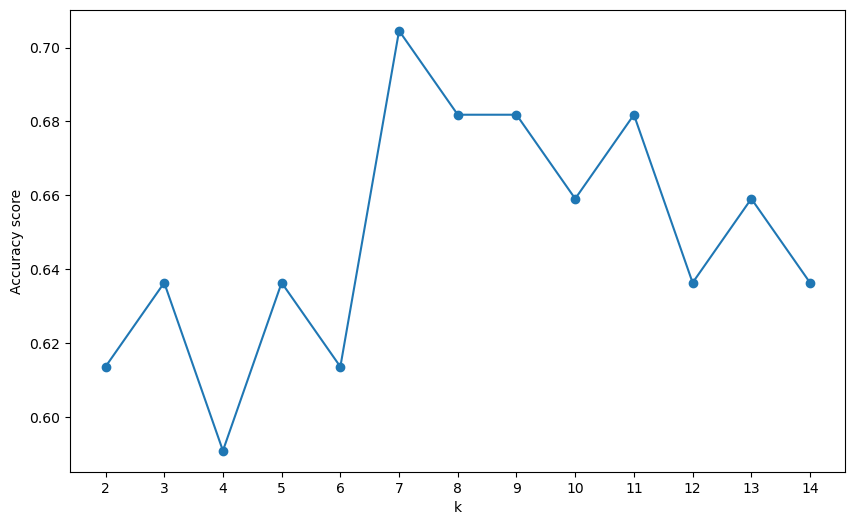

In [16]:
# Plot accuracy score vs K number
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
k_values = range(2, 15)
plt.xticks(k_values, [k for k in k_values])
plt.show()

The best `k` number according to accuracy score is **7**.

#### - Mean squared error vs number of K

In [17]:
# Elbow method using mean square error (MSE) as metric (lower MSE -> better model)

from sklearn.metrics import mean_squared_error

MSEs = []

# Create a for loop to compute the MSE according to the k number
for k in range(2,15):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [18]:
print(MSEs)

[0.38636363636363635, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365, 0.38636363636363635, 0.29545454545454547, 0.3181818181818182, 0.3181818181818182, 0.3409090909090909, 0.3181818181818182, 0.36363636363636365, 0.3409090909090909, 0.36363636363636365]


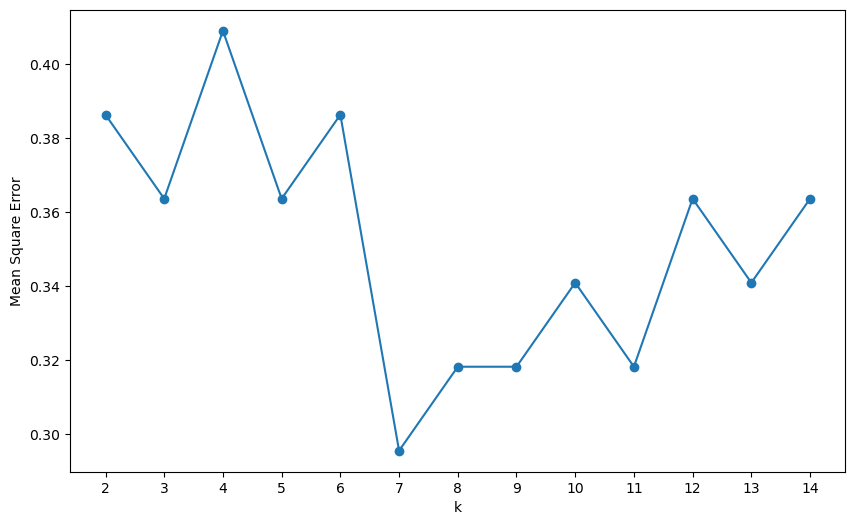

In [19]:
# Plot mean square error vs K number
plt.figure(figsize=(10,6))
plt.plot(range(2,15), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
k_values = range(2, 15)
plt.xticks(k_values, [k for k in k_values])
plt.show()

The best `k` number according to MSE is **7**.

#### - Recall score vs number of K

In [22]:
# Create a for loop to compute the recall score according to the k number
recall_scores = []
for k in range(2, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred)
    recall_scores.append(score)

In [23]:
print(recall_scores)

[0.2608695652173913, 0.30434782608695654, 0.21739130434782608, 0.34782608695652173, 0.30434782608695654, 0.4782608695652174, 0.391304347826087, 0.391304347826087, 0.34782608695652173, 0.391304347826087, 0.30434782608695654, 0.34782608695652173, 0.30434782608695654]


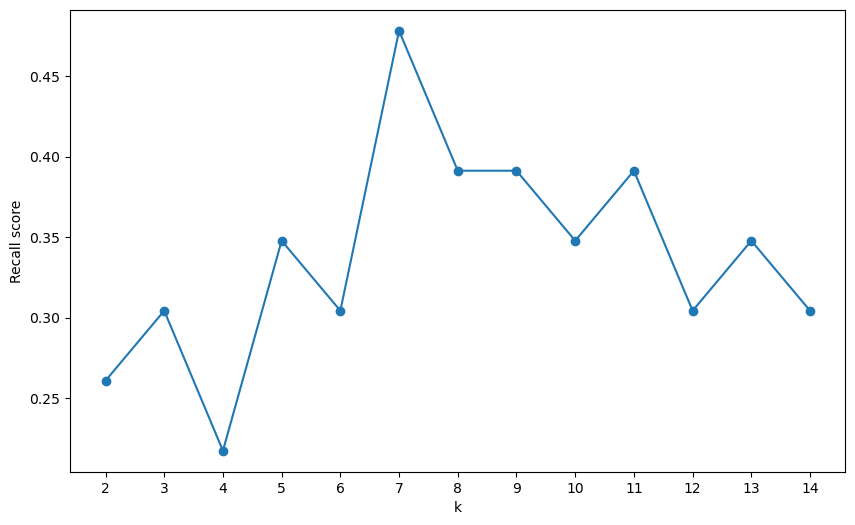

In [24]:
# Plot recall score vs K number
plt.figure(figsize=(10,6))
plt.plot(range(2,15), recall_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Recall score')
k_values = range(2, 15)
plt.xticks(k_values, [k for k in k_values])
plt.show()

#### - Evaluation of the model with confusion matrix

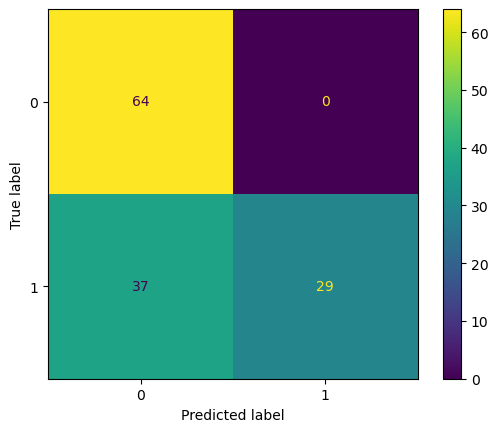

In [25]:
#Display confusion matrix for train data
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=model.classes_)
disp.plot()
plt.show()

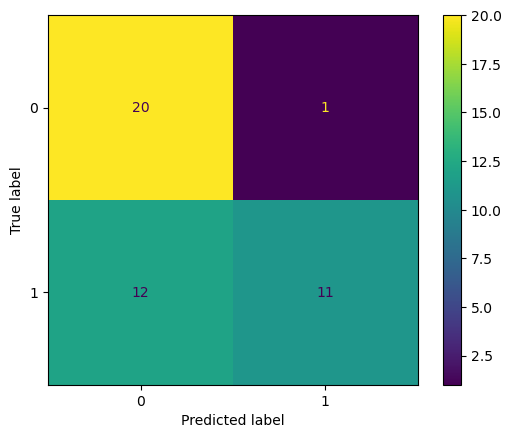

In [26]:
#Now for test
cm_train = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm_train, display_labels=model.classes_)
disp.plot()
plt.show()

In [27]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.70
The precision in the TEST set is: 0.92
The recall in the TEST set is: 0.48
The F1 in the TEST set is: 0.63
The Kappa in the TEST set is: 0.42


The `recall` is very low with **0.48**.  
It will be reviewed if the model can be improved.

### 4. Improving the model

In [28]:
# Create a function to test multiple times the Knn classifier, trying to improve the metrics with different modifications

def KNN_classifier_model(df):
    y = df['class']
    X = df.drop(['class'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    cm_test = confusion_matrix(y_test,y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp.plot()
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    kappa = cohen_kappa_score(y_test, y_pred_test)
    
    result = f'''
    The accuracy in the TEST set is: {accuracy:.2f}
    The precision in the TEST set is: {precision:.2f}
    The recall in the TEST set is: {recall:.2f}
    The F1 in the TEST set is: {f1:.2f}
    The Kappa in the TEST set is: {kappa:.2f}
    '''

    for line in result.split('\n'):
        print(line)

#### 4.1 High correlated columns removal (hr)

In [29]:
# Calculate correlation matrix
correlation_matrix = df_scaled.corr()

# Set a correlation threshold
correlation_threshold = 0.85

# Identify highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

# Create a set to keep track of features to remove
features_to_remove = set()

# Loop through the pairs and decide which features to remove
for feature1, feature2 in zip(*highly_correlated_pairs):
    if feature1 != feature2 and feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Convert indices to column labels
columns_to_remove = [df_scaled.columns[idx] for idx in features_to_remove]
print(len(columns_to_remove))

139


In [30]:
hr_df = df_scaled.drop(columns=columns_to_remove)
hr_df.shape

(174, 312)


    The accuracy in the TEST set is: 0.64
    The precision in the TEST set is: 1.00
    The recall in the TEST set is: 0.30
    The F1 in the TEST set is: 0.47
    The Kappa in the TEST set is: 0.29
    


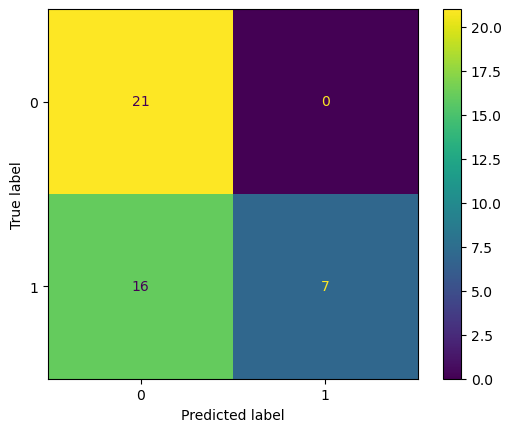

In [31]:
KNN_classifier_model(hr_df)

<u>All metrics decrease</u> when columns with high correlation are removed.

#### 4.2 Outliers imputation (oi)

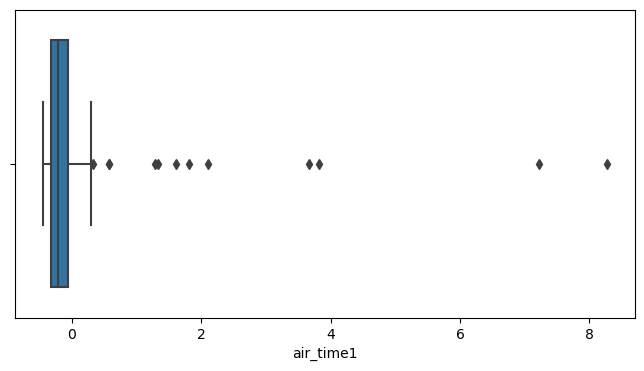

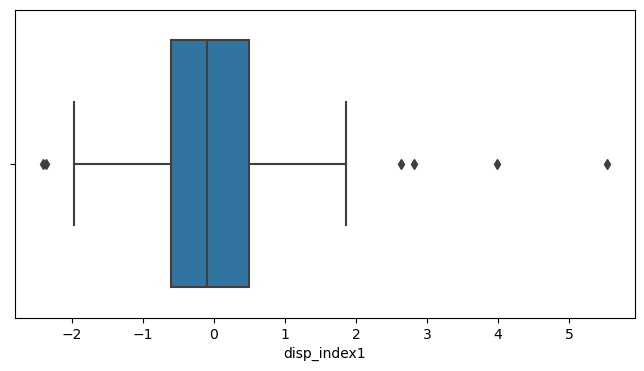

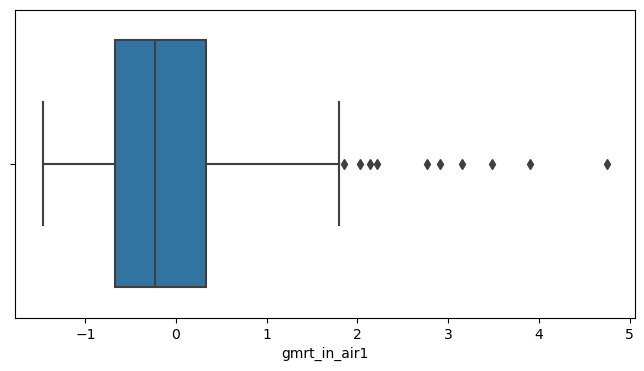

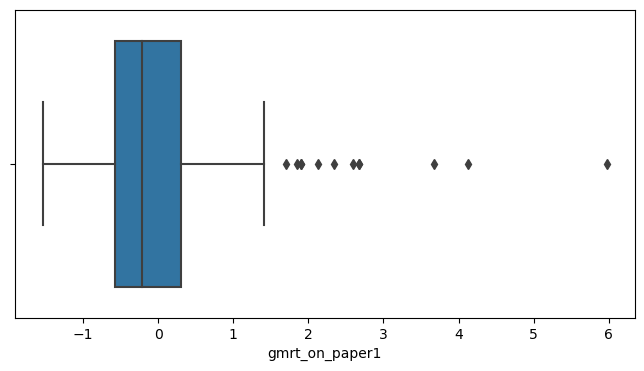

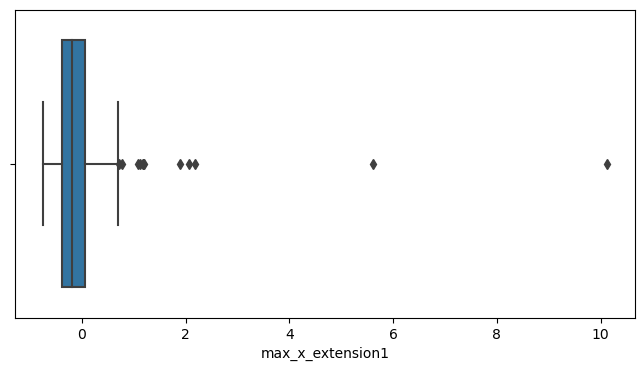

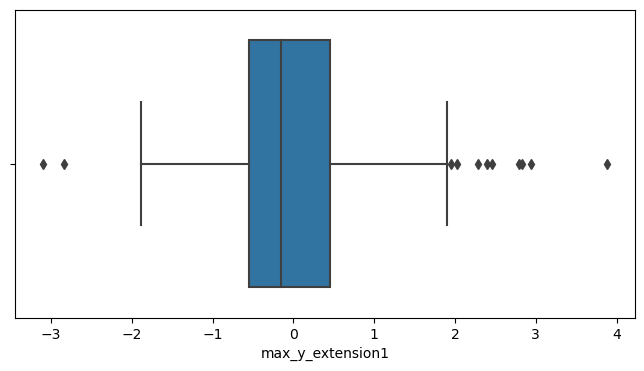

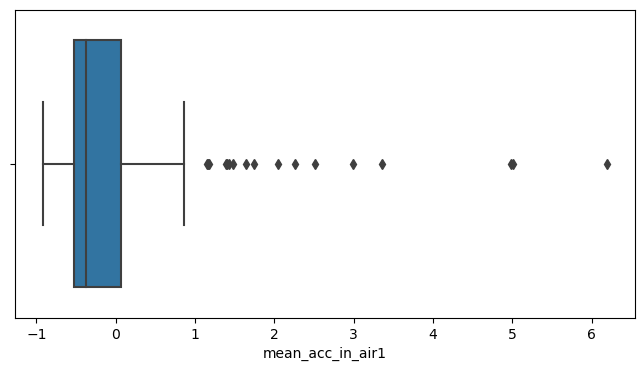

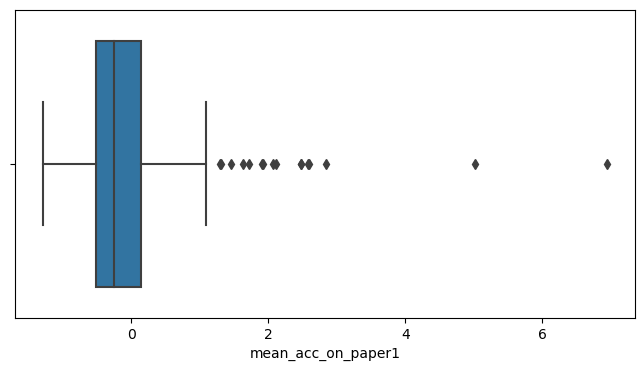

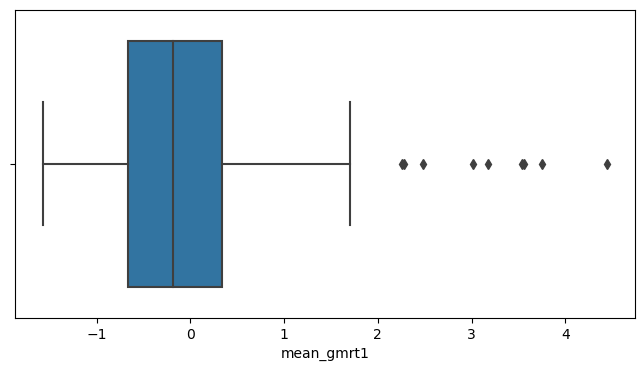

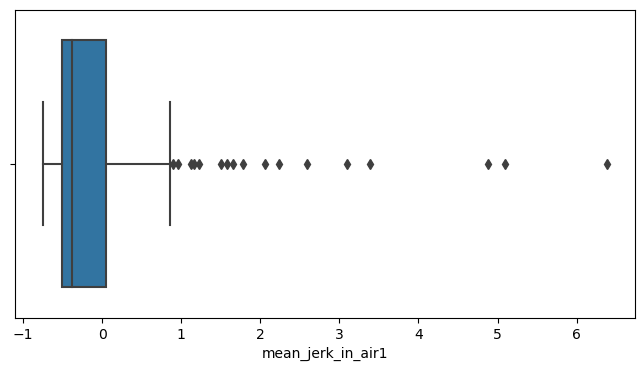

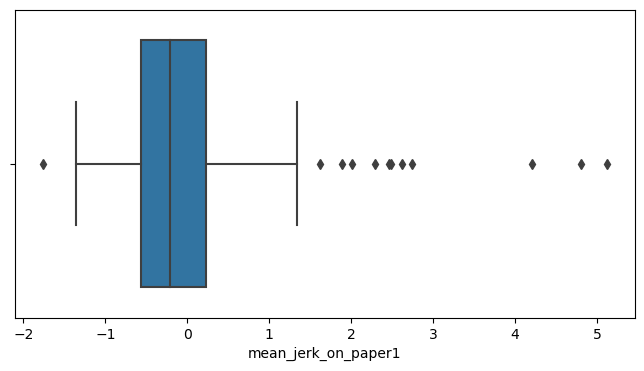

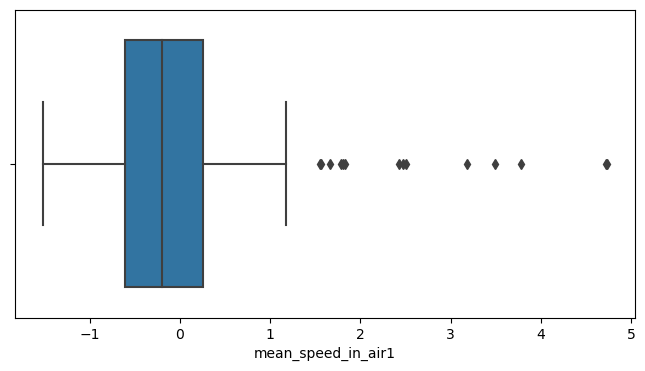

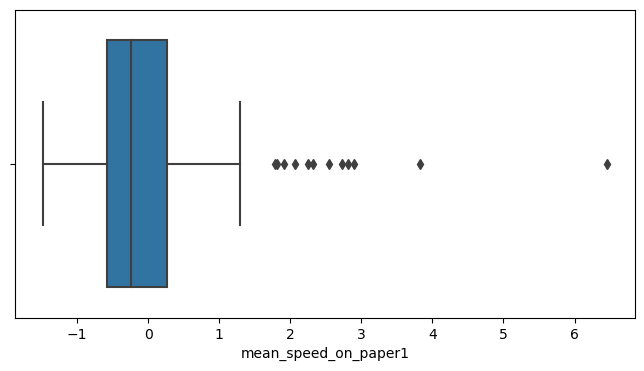

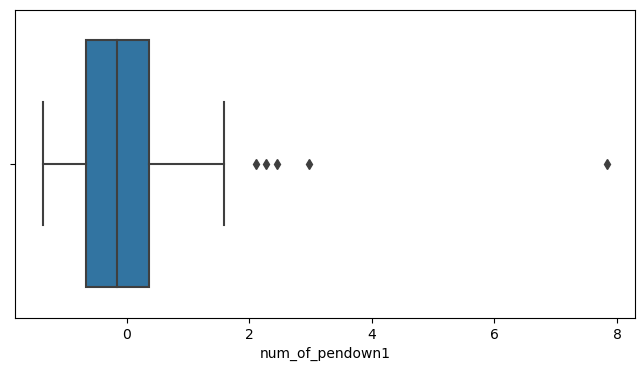

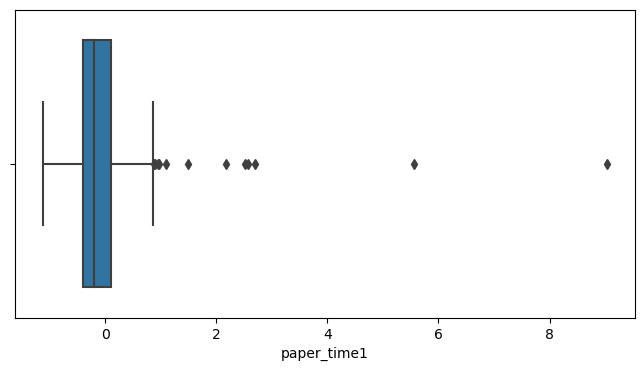

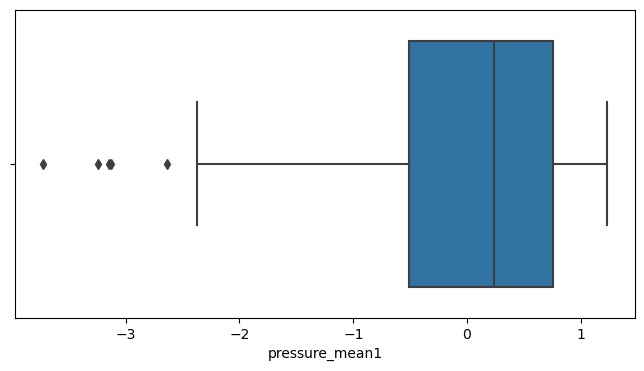

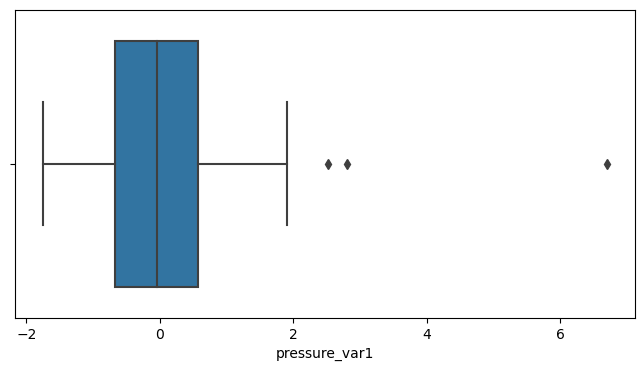

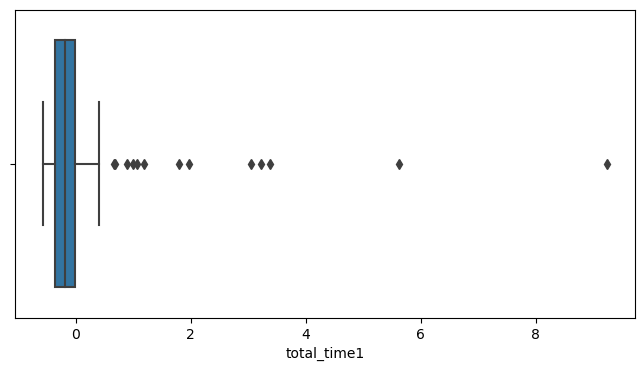

In [32]:
# Check the outliers with the boxplots.
for column in df_scaled.columns[0:18]:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_scaled, x=column)
    plt.show()

In [33]:
# Create a copy to avoid make changes in the scaled dataframe
oi_df = df_scaled

In [34]:
outliers_index = {}  # A dictionary to store the indices of outliers for each column
modes = oi_df.mode().iloc[0]  # Calculate the mode for each column

# Using the mode to impute outliers may be more optimal, as it is less sensitive to these values, compared to using the mean.

# A for loop to find the interquantile range, the upper and lower limits, the indices for every each column, and impute outlier with the mode.
for column in oi_df.columns:
    q1 = np.percentile(oi_df[column], 25)  # Percentile 25
    q3 = np.percentile(oi_df[column], 75)  # Percentile 75
    iqr = q3 - q1

    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Find and store the indices of outliers
    outliers_index[column] = oi_df[(oi_df[column] < lower_limit) | (oi_df[column] > upper_limit)].index
    
    # Impute outliers with the mode
    oi_df.loc[outliers_index[column], column] = modes[column]

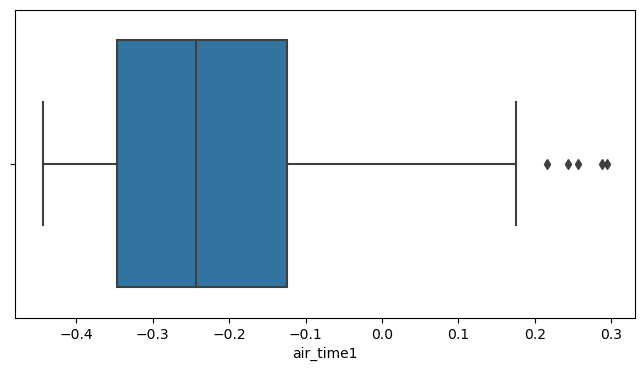

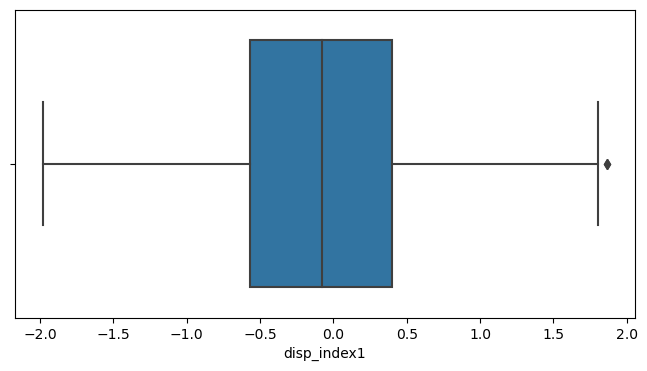

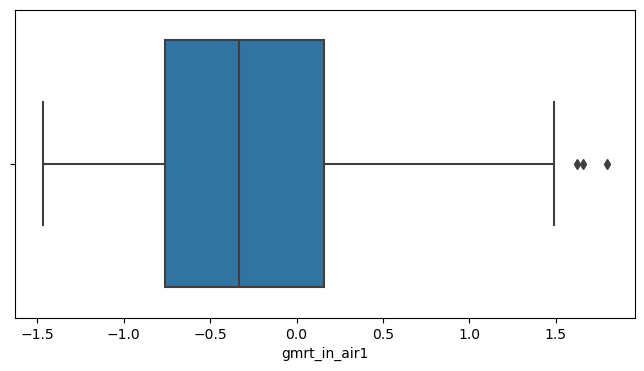

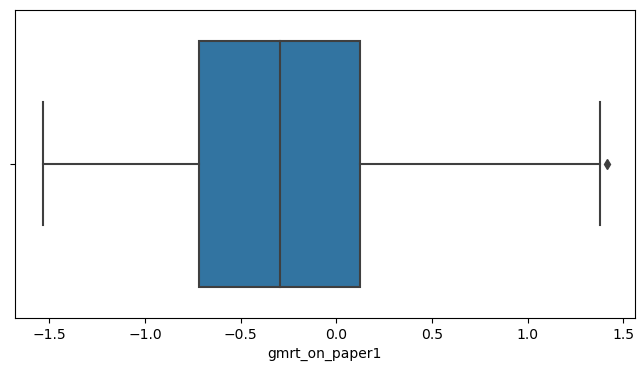

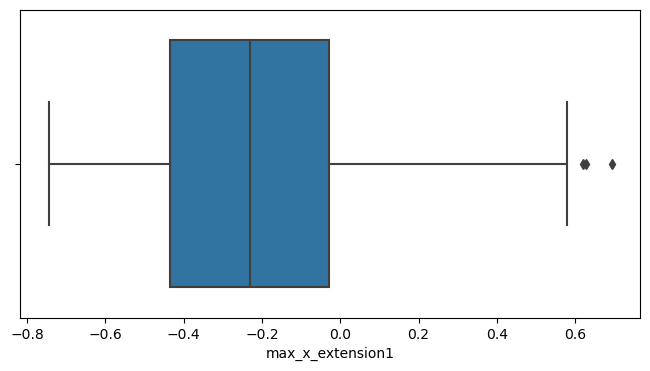

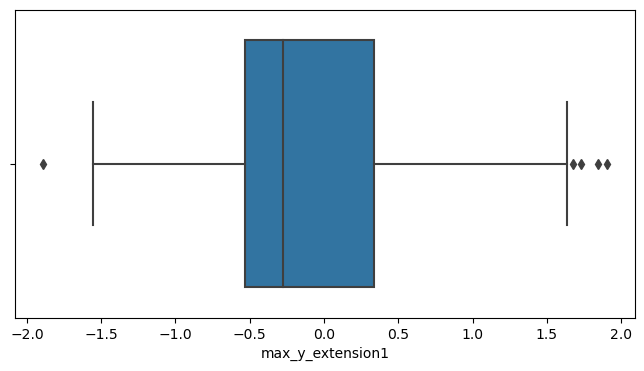

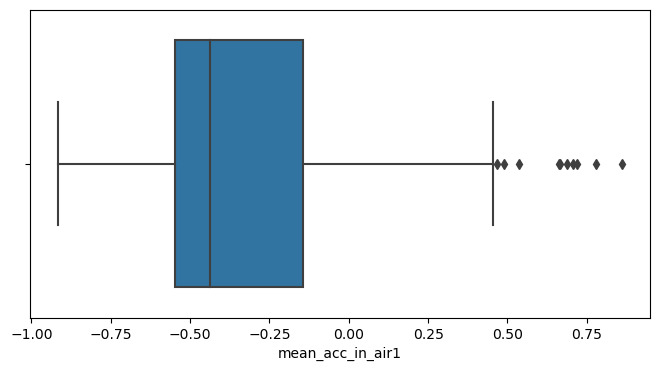

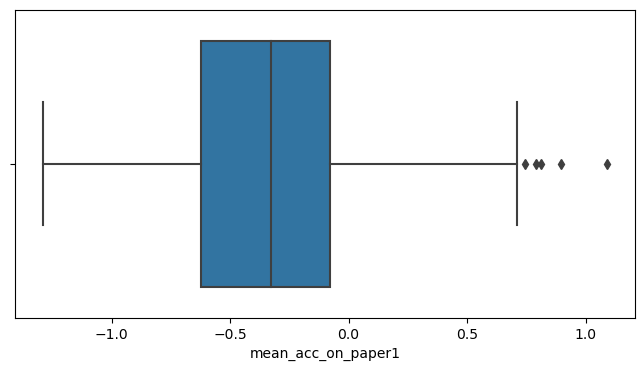

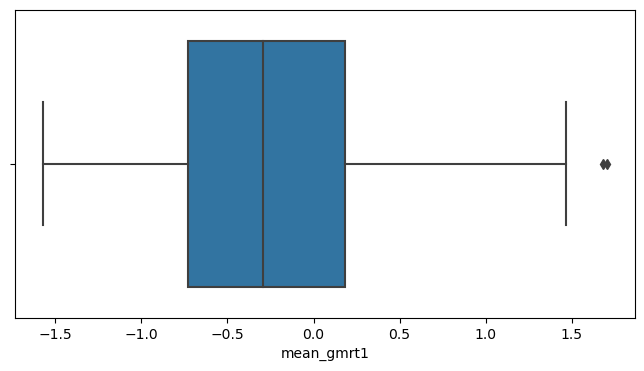

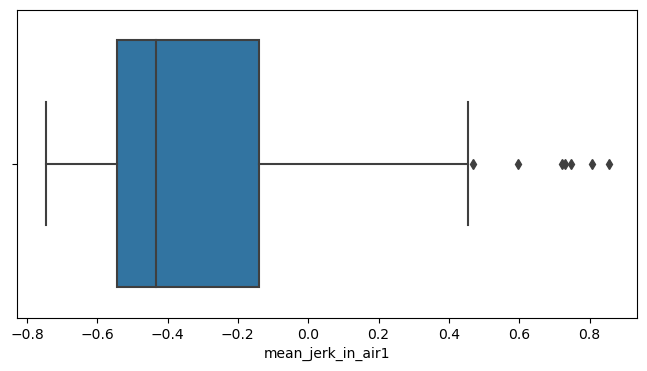

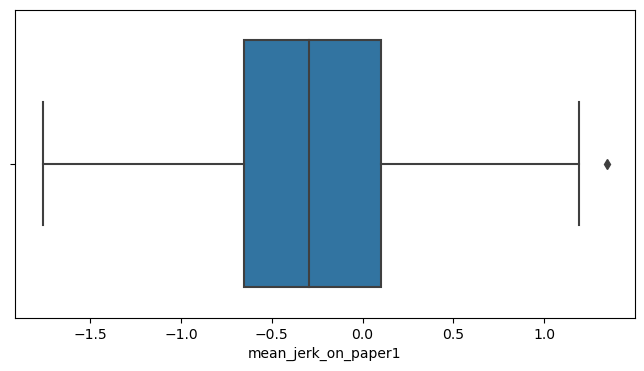

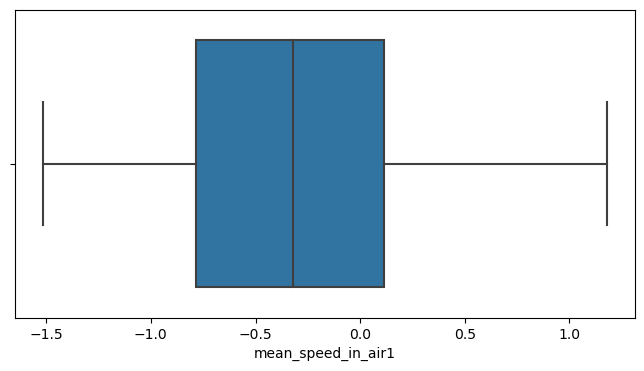

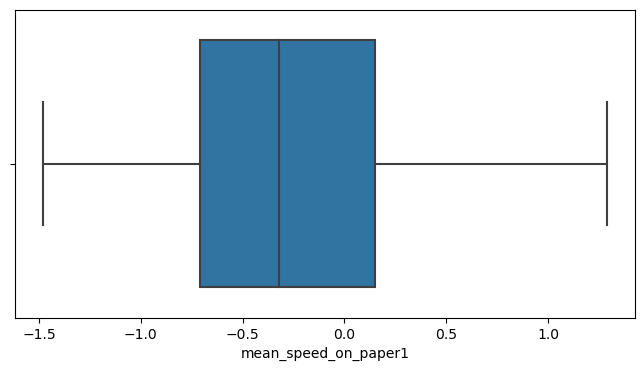

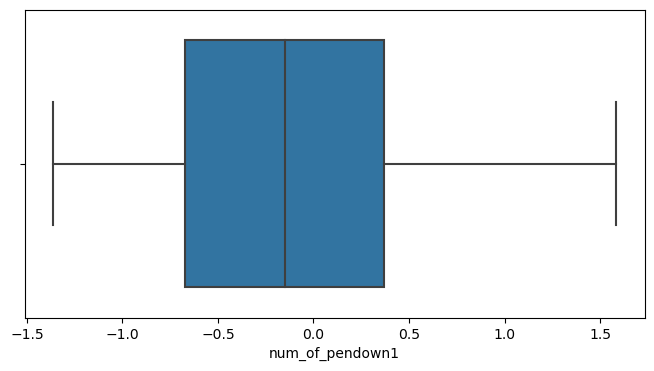

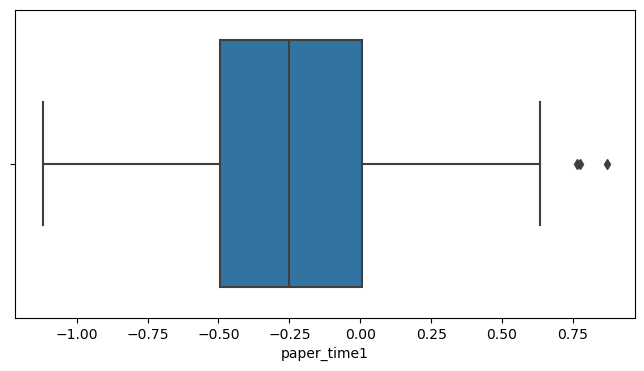

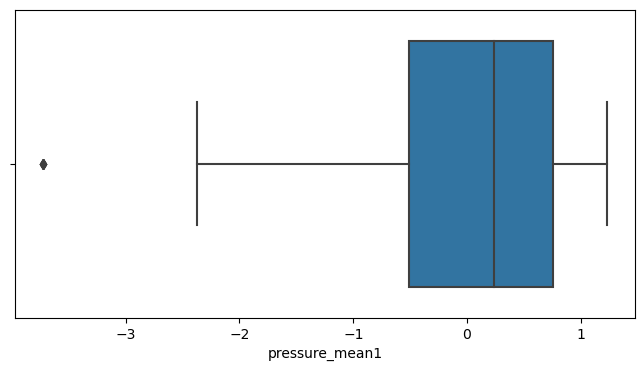

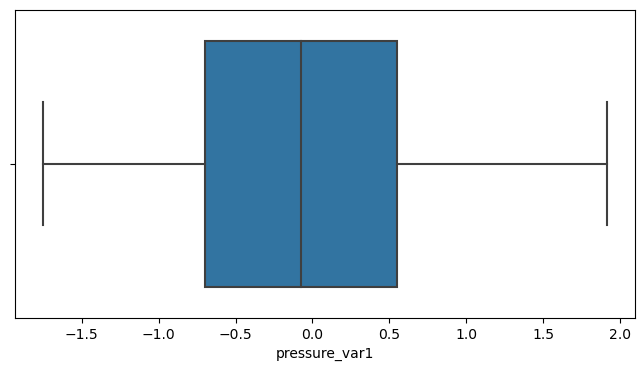

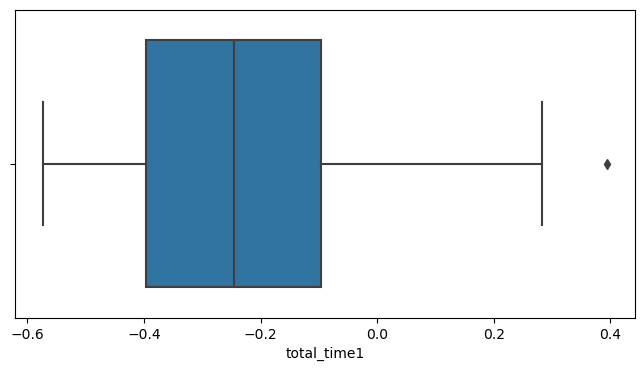

In [35]:
# Check the outliers with the boxplots.
for column in oi_df.columns[0:18]:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=oi_df, x=column)
    plt.show()


    The accuracy in the TEST set is: 0.73
    The precision in the TEST set is: 1.00
    The recall in the TEST set is: 0.48
    The F1 in the TEST set is: 0.65
    The Kappa in the TEST set is: 0.47
    


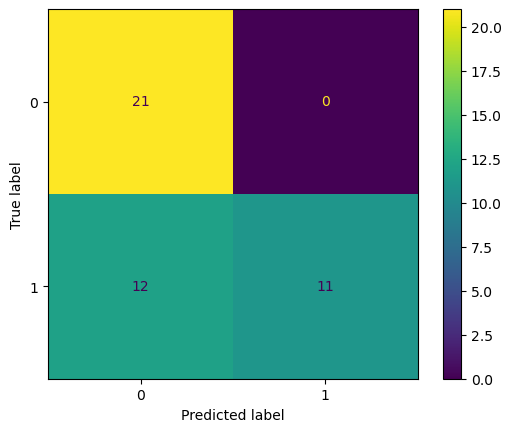

In [36]:
KNN_classifier_model(oi_df)

<u>The recall remains</u> at **0.48** and all other metrics **increase**.

#### 4.3 Low variance columns removal (lr)

In [37]:
# Calculate variance for each feature
variances = oi_df.var()

# Set a threshold
threshold = 0.25

# Filter features with variance below the threshold
low_variance_features = variances[variances <= threshold].index
len(low_variance_features)

124

In [38]:
lr_df = oi_df.drop(columns=low_variance_features)
lr_df.shape

(174, 327)


    The accuracy in the TEST set is: 0.73
    The precision in the TEST set is: 1.00
    The recall in the TEST set is: 0.48
    The F1 in the TEST set is: 0.65
    The Kappa in the TEST set is: 0.47
    


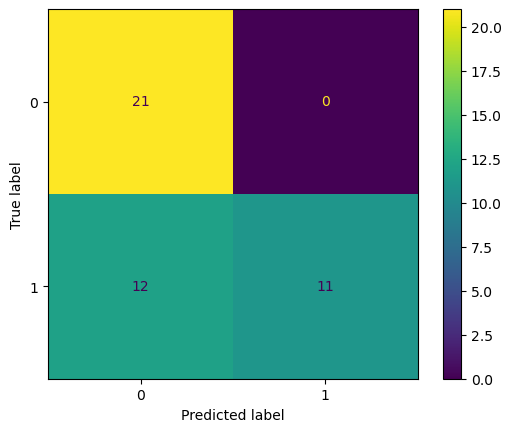

In [39]:
KNN_classifier_model(lr_df)

<u>By removing columns with low variance</u>, **all metrics remain the same**.  
This makes the model less complex and reduces training time.

### 5. Conclusions

After reviewing the best `k number` for the model and analyzing the behavior of accuracy, recall, and mean square error through graphs, some adjustments were made to improve the evaluated metrics. The changes were the following:

- <u>Remove highly correlated columns. All metrics such as accuracy, precision, recall, F1 and Kappa decreased</u>. Although they were highly correlated, they could have provided specific details or characteristics crucial to classification.
- <u>The imputation of outliers. It kept the recall the same but the other metrics increased</u>. The presence of outliers was negatively affecting the model's ability to make accurate predictions.
- <u>Eliminate columns with low variance. All metrics remained the same</u>. This suggests that those features were not providing much unique information and may have been redundant or less informative. In addition, the model was simplified, making it less complex and reducing training time.

That said, the best classification model with which the best prediction metrics were obtained was the Random Forest Classifier. These metrics are the following:

The `accuracy` in the TEST set is: **0.73**  
The `precision` in the TEST set is: **1.00**  
The `recall` in the TEST set is: **0.48**  
The `F1` in the TEST set is: **0.65**  
The `Kappa` in the TEST set is: **0.47**  